<a href="https://colab.research.google.com/github/angelica-sjsu/msda/blob/master/cnn_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
import scipy.io as sio
import numpy as np

In [0]:
def loader (path):
  data = sio.loadmat(path)
  return data['X'], data['y']

In [0]:
train_images, train_labels = loader('/content/drive/My Drive/ML/DATASET/data_training_color.mat')
test_images, test_labels = loader('/content/drive/My Drive/ML/DATASET/data_test_color.mat')

In [0]:
def modify_labels(array):
    labels = []
    for e in array:
        if e == 'Black_Rot  ':
            labels.append(1)
        elif e == 'Esca       ':
            labels.append(2)
        elif e == 'Leaf_Blight':
            labels.append(3)
        else:
            labels.append(0)
            
    return [labels]

In [0]:
labels = []
labels = modify_labels(train_labels)
train_labels = np.array(labels)

labels = []
labels = modify_labels(test_labels)
test_labels = np.array(labels)

In [8]:
train_images.shape

(3666, 256, 256, 3)

In [0]:
train_labels = train_labels.transpose()
test_labels = test_labels.transpose()

In [0]:
def normalize (images):
  mean = np.mean(images, axis=0)
  std_dev = np.std(images, axis = 0)
  norm = (images - mean)/std_dev

  return norm

In [0]:
# train images
train_norm = normalize(train_images)

#test images
test_norm = normalize(test_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

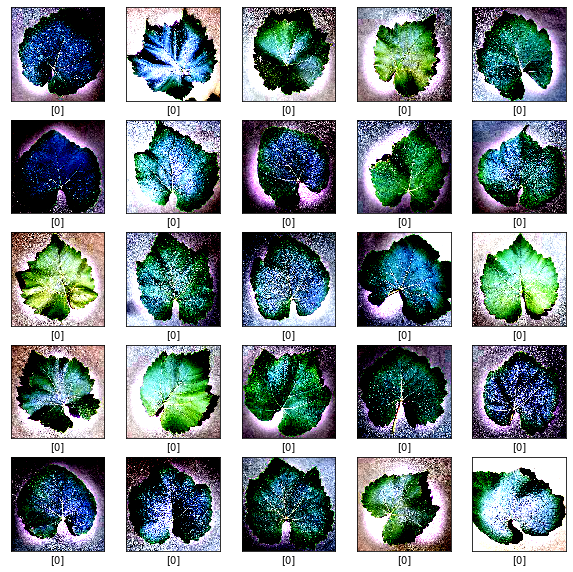

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_norm[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

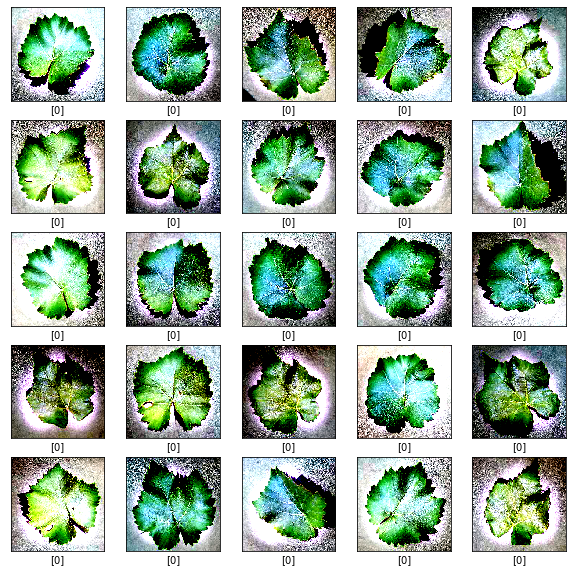

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_norm[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(4))
model.add(layers.BatchNormalization())

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_norm, train_labels, epochs=10, 
                    validation_data=(test_norm, test_labels))

Train on 3666 samples, validate on 396 samples
Epoch 1/10
3666/3666 [==============================] - 28s 8ms/sample - loss: 0.5091 - accuracy: 0.8944 - val_loss: 1.7912 - val_accuracy: 0.5581
Epoch 2/10
3666/3666 [==============================] - 19s 5ms/sample - loss: 0.3302 - accuracy: 0.9719 - val_loss: 1.0688 - val_accuracy: 0.6439
Epoch 3/10
3666/3666 [==============================] - 19s 5ms/sample - loss: 0.2539 - accuracy: 0.9850 - val_loss: 0.6291 - val_accuracy: 0.8005
Epoch 4/10
3666/3666 [==============================] - 19s 5ms/sample - loss: 0.2014 - accuracy: 0.9959 - val_loss: 0.3904 - val_accuracy: 0.9167
Epoch 5/10
3666/3666 [==============================] - 19s 5ms/sample - loss: 0.1716 - accuracy: 0.9973 - val_loss: 0.2771 - val_accuracy: 0.9394
Epoch 6/10
3666/3666 [==============================] - 19s 5ms/sample - loss: 0.1461 - accuracy: 0.9967 - val_loss: 0.2930 - val_accuracy: 0.9318
Epoch 7/10
3666/3666 [==============================] - 19s 5ms/sample 

396/396 - 1s - loss: 86.8987 - accuracy: 0.3434


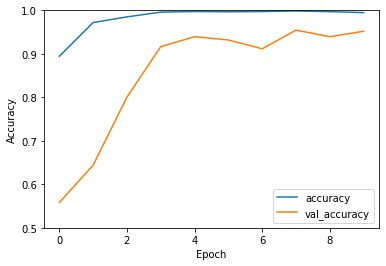

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)